## Загрузим данные и подготовим их к анализу

В самом начале импортируем необходимые библиотеки.


In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки numpy
import numpy as np
# импорт модулей работы с датойвременем
from datetime import datetime, timedelta
# импорт pyplot для построения графиков
from matplotlib import pyplot as plt

### Просмотр данных

Прочитаем файлы с данными и сохраним их в переменных `visits`, `orders` и `costs`.

In [2]:
# чтение и сохранение в соответствующие переменные
visits, orders, costs = (
    pd.read_csv('visits_info.csv'),  # лог сервера с данными о посещениях пользователей
    pd.read_csv('orders_info.csv'),  # покупки пользовтелей за период
    pd.read_csv('costs_info.csv')    # расходы на рекламу
)

Посмотрим, какие данные у нас имеются.

In [3]:
# общая информация о таблице visits
visits.info()
# получение первых 10 строк таблицы visits
visits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57
5,90242400005,United States,iPhone,RocketSuperAds,01.05.2019 07:14,01.05.2019 08:19
6,43958116050,United States,Android,organic,01.05.2019 09:03,01.05.2019 10:08
7,185365244969,United States,iPhone,organic,01.05.2019 09:37,01.05.2019 10:00
8,446013509831,United States,iPhone,RocketSuperAds,01.05.2019 10:26,01.05.2019 10:59
9,100970711362,United States,Mac,TipTop,01.05.2019 04:39,01.05.2019 04:57


В таблице `visits` 309901 строка и 6 столбцов. Типы данных, встречаемых в столбцах: `object`(5) и `int`(1).

Описание данных согласно документации:
* `User Id` — уникальный идентификатор пользователя;
* `Device` — категория устройства пользователя;
* `Session start` — дата и время начала сессии;
* `Session End` — дата и время окончания сессии;
* `Channel` — идентификатор рекламного источника, из которого пришел пользователь;
* `Region` — страна пользователя.

В названиях колонок видны нарушения стиля:
- использование camelCase вместо snake_case;
- отсутствие нижнего подчёркивания в названиях некоторых столбцов.

Видим, что у двух столбцов `Session start` и `Session End`, содержащих дату и время, некорректный тип данных `object`, который необходимо изменить на `datetime`. 

Проверим временные интервалы на соответствие условиям проекта. У нас там указан период с мая 2019 по октябрь 2019 года.

In [4]:
# выведем минимальные и максимальные значения из столбцов с датами
print('Время начала сессий лежит в интервале от {} до {}'
      .format(visits['Session Start'].min(), visits['Session Start'].max()))
print('Время окончания сессий лежит в интервале от {} до {}'
      .format(visits['Session End'].min(), visits['Session End'].max()))

Время начала сессий лежит в интервале от 01.05.2019 00:00 до 31.10.2019 23:59
Время окончания сессий лежит в интервале от 01.05.2019 00:07 до 31.10.2019 23:59


Взглянем, что у нас в категориальных переменных.

In [5]:
# выводим значения столбца со странами
visits['Region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

In [6]:
# выводим значения столбца с устройствами
visits['Device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

In [7]:
# выводим значения столбца с каналами привлечения
visits['Channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

In [8]:
# общая информация о таблице orders
orders.info()
# получение первых 10 строк таблицы orders
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


В таблице `orders` 40212 строк и 3 столбца. Типы данных, встречаемых в столбцах: `int`(1), `object`(1) и `float`(1) .

Описание данных согласно документации:
* `User Id` — уникальный идентификатор пользователя, который сделал заказ;
* `Event Dt` — дата и время покупки;
* `Revenue` — выручка.

В названиях колонок видны нарушения стиля:
- использование camelCase вместо snake_case;
- отсутствие нижнего подчёркивания в названиях некоторых столбцов.

Видим, что у столбца `Event Dt`, содержащего дату и время, некорректный тип данных `object`, который необходимо изменить на `datetime`. Проверим также соответсвие временного интервала в таблице.

In [9]:
# выведем минимальные и максимальные значения из столбцов с датами
print('Время покупки лежит в интервале от {} до {}'
      .format(orders['Event Dt'].min(), orders['Event Dt'].max()))

Время покупки лежит в интервале от 2019-05-01 00:28:11 до 2019-10-31 23:56:56


In [10]:
# взглянем на статистические показатели столбца с выручкой таблицы orders
orders['Revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

Отрицательных значений нет.

In [11]:
# общая информация о таблице costs
costs.info()
# получение первых 10 строк таблицы costs
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


В таблице `costs` 1800 строк и 3 столбца. Типы данных, встречаемых в столбцах: `object`(2) и `float`(1) .

Описание данных согласно документации:
* `dt` — дата;
* `Channel` — идентификатор рекламного источника;
* `costs` — затраты на этот рекламный источник в этот день.

Видим, что у столбца `dt`, содержащего дату и время, некорректный тип данных `object`, который необходимо изменить на `datetime`. 

Взглянем на категориальные переменные.

In [12]:
# выводим значения столбца с каналами привлечения
costs['Channel'].value_counts()

YRabbit               180
FaceBoom              180
LeapBob               180
WahooNetBanner        180
lambdaMediaAds        180
MediaTornado          180
RocketSuperAds        180
OppleCreativeMedia    180
AdNonSense            180
TipTop                180
Name: Channel, dtype: int64

Сравним соответствие названий каналов из таблиц `costs` и `visits`.

In [13]:
# создадим множества из уникальных значений столбцов привлечения
channels_from_visits = set(visits['Channel'].unique())
channels_from_costs = set(costs['Channel'].unique())
print(channels_from_visits)
print(channels_from_costs)

{'RocketSuperAds', 'LeapBob', 'MediaTornado', 'FaceBoom', 'AdNonSense', 'WahooNetBanner', 'TipTop', 'organic', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit'}
{'RocketSuperAds', 'LeapBob', 'MediaTornado', 'FaceBoom', 'AdNonSense', 'WahooNetBanner', 'TipTop', 'OppleCreativeMedia', 'lambdaMediaAds', 'YRabbit'}


In [14]:
# удалим пользователей категории organic
channels_from_visits.remove('organic')

In [15]:
if channels_from_costs == channels_from_visits:
    print('В наших таблицах категории совпадают')
else:
    print('В наших таблицах категории НЕ совпадают')

В наших таблицах категории совпадают


In [16]:
# взглянем на статистические показатели столбца с затратами таблицы costs
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Отрицательных значений нет.

**Вывод**

Рассмотрели имеющиеся данные, обнаружили недочёты в именовании столбцов и заметили, что все столбцы, которые содержат дату и время, имеют тип данных `object`, которых необходимо исправить. Количество значений в столбцах таблиц совпадает с общим количеством строк в каждой, а это означает, что пропусков у нас нет. Временные интервалы в таблицах соответствуют условиям проекта, рассмотрели категориальные и количественные переменные на предмет ошибок.

### Преодобработка данных

#### Переименование столбцов

Устраним недочёты в названиях столбцов.

In [17]:
# перечень названий столбцов таблицы visits
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

Переименуем некоторые столбцы в snake_case и устраним заглавные буквы.

In [18]:
# переименование столбцов
visits = visits.rename(columns={
    'User Id': 'user_id',
    'Session Start': 'session_start',
    'Session End': 'session_end'
})
# приведём названия всех столбцов к нижнему регистру
visits.columns = map(str.lower, visits.columns)

Посмотрим, что получилось.

In [19]:
# просмотр названий столбцов
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [20]:
# перечень названий столбцов таблицы orders
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

Переименуем некоторые столбцы в snake_case и устраним заглавные буквы.

In [21]:
# переименование столбцов
orders = orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt'
})
# приведём названия всех столбцов к нижнему регистру
orders.columns = map(str.lower, orders.columns)

Посмотрим, что получилось.

In [22]:
# просмотр названий столбцов
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [23]:
# перечень названий столбцов таблицы costs
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

Устраним заглавные буквы в названиях столбцов.

In [24]:
# приведём названия всех столбцов к нижнему регистру
costs.columns = map(str.lower, costs.columns)

Посмотрим, что получилось.

In [25]:
# просмотр названий столбцов
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

**Вывод**

Столбцы переименовали, идём дальше.

#### Исправление типов данных в столбцах таблиц

Каждая из наших трёх таблиц в столбцах с датой и временем имеет тип данных `object`. Исправим это!)

In [26]:
# преобразуем типы нужных столбцов
time_format = '%d.%m.%Y %H:%M'
visits['session_start'] = pd.to_datetime(visits['session_start'], format = time_format)
visits['session_end'] = pd.to_datetime(visits['session_end'], format = time_format)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим, что всё получилось.

In [27]:
# общая информация о таблице visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [28]:
# общая информация о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [29]:
# общая информация о таблице costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Рассмотрим дополнительно, не превышает ли время начала сессии время её окончания у каких-либо записей в таблице `visits`.

In [30]:
visits[visits['session_start'] > visits['session_end']]

,user_id,region,device,channel,session_start,session_end


**Вывод**

Причесали названия столбцов и сделали необходимые преобразования типов данных.

#### Обработка дубликатов

Проверим наличие явных дубликатов в наших таблицах.

In [31]:
# подсчёт явных дубликатов
print("Кол-во дубликатов: {}".format(visits.duplicated().sum()))
print("Кол-во дубликатов: {}".format(orders.duplicated().sum()))
print("Кол-во дубликатов: {}".format(costs.duplicated().sum()))

Кол-во дубликатов: 0
Кол-во дубликатов: 0
Кол-во дубликатов: 0


**Вывод**

Явных дубликатов не обнаружено.

## Проведем исследовательский анализ данных

Зададим функцию создания профилей пользователей.

In [32]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
    """
    Функция позволяет создать пользовательский профиль и использует данные из
    таблиц с пользовательскими сессиями, покупками и рекламными затратами
    """
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'session_end': 'last',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts',
                         'session_end': 'last_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')
    profiles['last_dt'] = profiles['last_ts'].dt.date
    profiles['last_month'] = profiles['last_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Определение минимальной и максимальной даты привлечения пользователей

In [33]:
# создание датафрейма с профилями пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,last_ts,channel,device,region,dt,month,week,last_dt,last_month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,2019-05-09 08:40:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,2019-05-02,2019-05-09,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,2019-07-10 23:00:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,2019-07-04,2019-07-10,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,2019-10-03 10:44:00,organic,iPhone,France,2019-10-01,2019-10-01,2019-09-26,2019-10-03,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,2019-08-22 21:52:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,2019-08-22,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,2019-10-02 00:20:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,2019-09-26,2019-10-02,2019-10-01,False,0.230769


Определили первые и последние даты привлечения для каждого пользователя. Выделили для каждого экстремума отдельно дату и отдельно месяц. Отметили платящих пользователей и добавили стоимость привлечения для каждого пользователя.

In [34]:
# выведем минимальные и максимальные значения из столбцов с датами привлечения пользователей
print('Даты привлечения находятся в интервале от {} до {}'
      .format(profiles['dt'].min(), profiles['last_dt'].max()))

Даты привлечения находятся в интервале от 2019-05-01 до 2019-11-01


Даты привлечения совпадают с условиями проекта.

### Распределение пользователей по странам

Выясним, из каких стран приходят посетители и в каких странах больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
# отформатируем отображение дробных значений
pd.set_option('display.float_format', '{:.3%}'.format)
# создадим функцию для группировки
def profiles_grouping(column):
    result = (
              profiles.groupby([column])
                      .agg(total_users=('user_id', 'nunique'),
                           payers_share=('payer', 'mean'))
                      .sort_values(by='total_users', ascending=False)
    )
    return result
# делаем необходимую группировку
profiles_grouping('region')

,total_users,payers_share
region,,
United States,100002,6.902%
UK,17575,3.983%
France,17450,3.799%
Germany,14981,4.112%


Видим, что больше всего пользователей из Соединённых Штатов, среди них же самый высокий процент платящих пользователей. Остальные три страны схожи по количеству юзеров, но среди них доля платящих пользователей чуть выше из Германии.

### Распределение пользователей по устройствам

Выясним, какими устройствами пользуются посетители и с каких устройств чаще всего заходят платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [36]:
# делаем необходимую группировку
profiles_grouping('device')

,total_users,payers_share
device,,
iPhone,54479,6.208%
Android,35032,5.852%
PC,30455,5.047%
Mac,30042,6.364%


Видим, что больше всего пользователей заходят через iPhone, остальные три типа устройств отстают, имея схожее количество пользователей. Самый высокий процент платящих пользователей в категории Mac и iPhone. 

### Распределение по каналам привлечения

Выясним, по каким рекламным каналам шло привлечение пользователей и какие каналы приносят больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
# делаем необходимую группировку
profiles_grouping('channel')

,total_users,payers_share
channel,,
organic,56439,2.055%
FaceBoom,29144,12.205%
TipTop,19561,9.601%
OppleCreativeMedia,8605,2.708%
LeapBob,8553,3.063%
WahooNetBanner,8553,5.296%
RocketSuperAds,4448,7.914%
MediaTornado,4364,3.575%
YRabbit,4312,3.827%


Видим, что больше всего пользователей заходят сами, но при этом среди них самый низкий процент платящих пользователей. Самый высокий процент среди пользователей, пришедших через FaceBoom.

**Вывод**

Больше всего пользователей из США, по типу устройства - iPhone, по каналу привлечения - пришедшие самостоятельно. Больше всего платящих пользователей из США, по типу устройства - iPhone и Mac, по каналу привлечения - FaceBoom.

## Построим отчёты и посчитаем метрики

Посчитаем метрики по трём направлениям: продукт, продажи и маркетинг.

### Продукт

#### Количество пользователей в день, неделю, месяц

Выясним, сколько людей пользуются приложением в день, неделю и месяц: рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

In [38]:
# возьмём нашу таблицу visits и выделим в ней дату, неделю и месяц начала сессии
visits['dt'] = visits['session_start'].dt.date
visits['month'] = visits['session_start'].astype('datetime64[M]')
visits['week'] = visits['session_start'].astype('datetime64[W]')

In [39]:
# рассчитаем средний показатель DAU
dau = visits.groupby(['dt']).agg({'user_id': 'nunique'})
dau_mean = int(dau.mean())
print('Средний показатель DAU за рассматриваемый период: {}'.format(dau_mean))

Средний показатель DAU за рассматриваемый период: 1684


Посмотрим, есть ли у нас непольные недели

In [40]:
# выведем неполные недели
broken_weeks = (visits
  .groupby(['week'])
  .agg({'user_id': 'nunique', 'dt' : 'nunique'})
  .query('dt != 7')
  .reset_index()
)
broken_weeks

,week,user_id,dt
0,2019-04-25,909,1
1,2019-10-31,724,1


Создадим список с этими неделями, чтобы исключить их.

In [41]:
# формируем список
broken_weeks_list = list(broken_weeks['week'])
broken_weeks_list

[Timestamp('2019-04-25 00:00:00'), Timestamp('2019-10-31 00:00:00')]

In [42]:
# рассчитаем средний показатель WAU
wau = visits.groupby(['week']).agg({'user_id': 'nunique'})
wau = wau.query('week not in @broken_weeks_list')
wau_mean = int(wau['user_id'].mean())
print('Средний показатель WAU за рассматриваемый период: {}'.format(wau_mean))

Средний показатель WAU за рассматриваемый период: 8490


In [43]:
# рассчитаем средний показатель MAU
mau = visits.groupby(['month']).agg({'user_id': 'nunique'})
mau_mean = int(mau.mean())
print('Средний показатель MAU за рассматриваемый период: {}'.format(mau_mean))

Средний показатель MAU за рассматриваемый период: 28989


In [44]:
# создадим функцию для построения графиков количества активных пользователей во времени
def line_plot(df, title, line = None):
    plt.rcParams['figure.figsize'] = (13,8)
    sns.set_style("darkgrid")
    sns.lineplot(data=df, dashes=False)   
    
    # вставим заглушку для линии, если ее нет
    if line == None: None
    else: 
        label = 'среднее значение = ' + str(line) # добавил легенду
        plt.axhline(y=line, color='red', linestyle='--', label = label)
        plt.legend()
        
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.show();

C:\ProgramData\Anaconda3\envs\praktikum_new\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


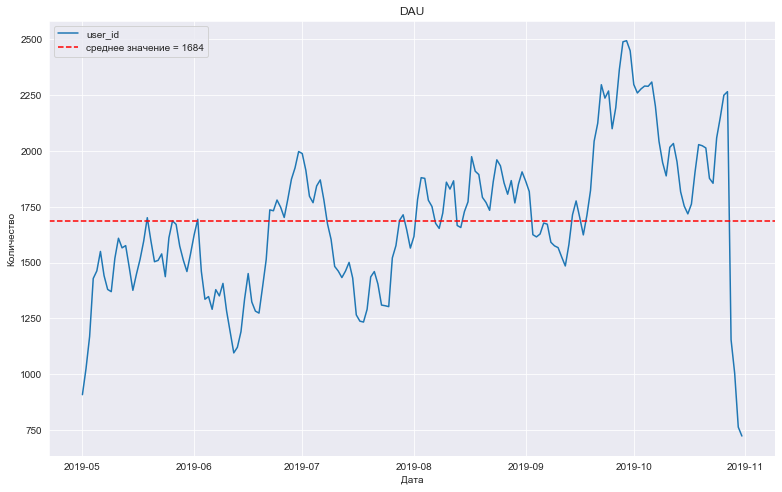

In [45]:
# построим график DAU во времени
line_plot(dau, 'DAU', dau_mean)

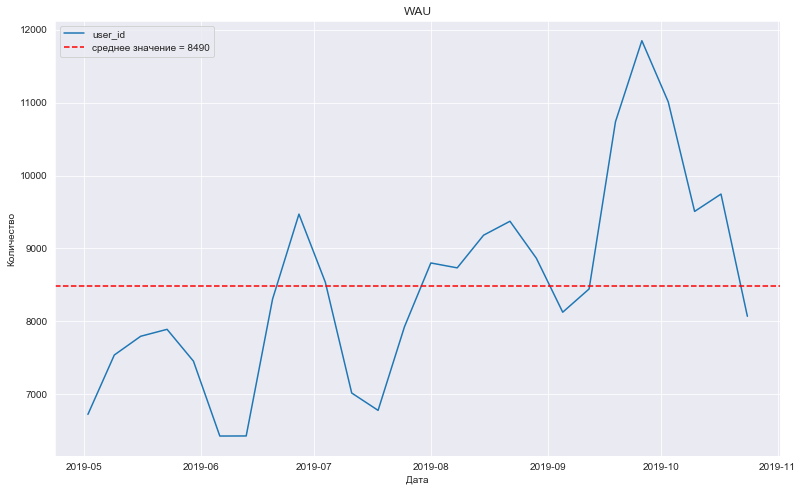

In [46]:
# построим график WAU во времени
line_plot(wau, 'WAU', wau_mean)

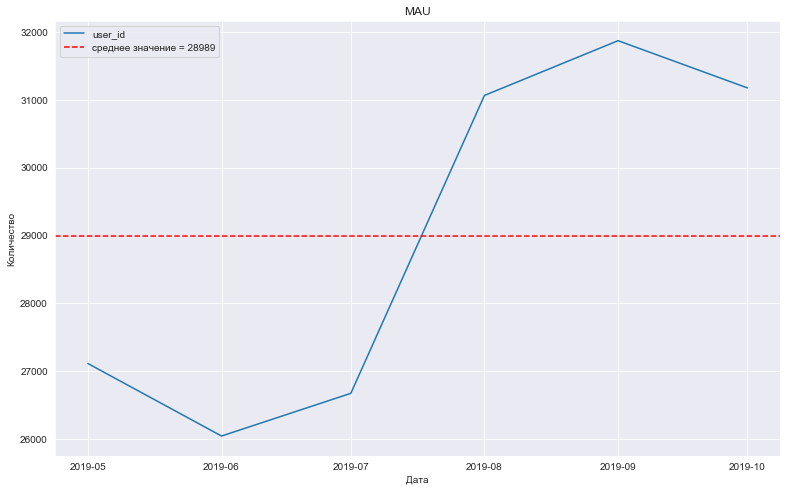

In [47]:
# построим график MAU во времени
line_plot(mau, 'MAU', mau_mean)

**Вывод**

Видим, что по всем метрикам количество активных пользователей росло до второй половины октября, когда наблюдается резкое падение количества активных пользователей. На графиках наблюдается некоторая цикличность.

#### Число пользовательских сессий

Изучим число пользовательских сессий. Построим гистограмму, отражающую распределение общего числа сессий в день, и выведем среднее количество сессий в день.

In [48]:
# группируем нашу таблицу visits по дате
total_sessions = visits.groupby(['dt']).agg({'user_id': ['count']})
print('Среднee количество пользовательских сессий в день: {}'.format(int(total_sessions.mean())))

Среднee количество пользовательских сессий в день: 1684


In [49]:
# создадим функцию для построения графиков количества активных пользователей во времени
def line_plot(df, title, line = None):
    plt.rcParams['figure.figsize'] = (13,8)
    sns.set_style("darkgrid")
    sns.lineplot(data=df, dashes=False)   
    
    # вставим заглушку для линии, если ее нет
    if line == None: None
    else: 
        label = 'среднее значение = ' + str(line) # добавил легенду
        plt.axhline(y=line, color='red', linestyle='--', label = label)
        plt.legend()
        
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.show();

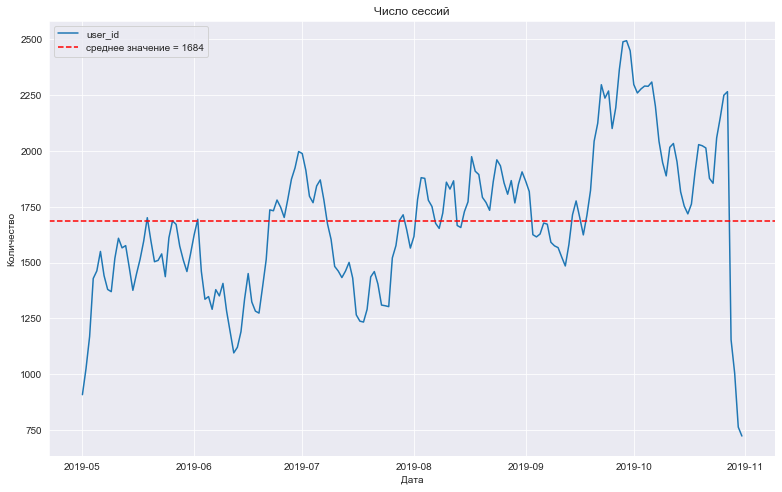

In [50]:
# строим график
line_plot(total_sessions, 'Число сессий', int(total_sessions.mean()))

**Вывод**

Среднее количество пользовательских сессий совпадает с DAU. График так же идентичный. Получается, что все пользователи заходят в приложение на чаще раза в календарный день.

#### ASL

Узнаем, сколько длится одна сессия. Построим гистограмму, отражающую распределение длительности сессий. Применяя метод describe(), построим таблицу с параметрами распределения. Нам необходимо добавить новый столбец, который будет содержать в себе длительность каждой сессии. Так как нам известно время начала и окончания сессии, то мы просто вычтем время начала из времени окончания.

In [51]:
# создаем новый столбец с длительостью сессии
visits['session_duration'] = (visits['session_end'] - visits['session_start']).dt.total_seconds()
# выводим ASL по новому столбцу
print('ASL: {} секунд'.format(int(visits['session_duration'].mean())))

ASL: 1800 секунд


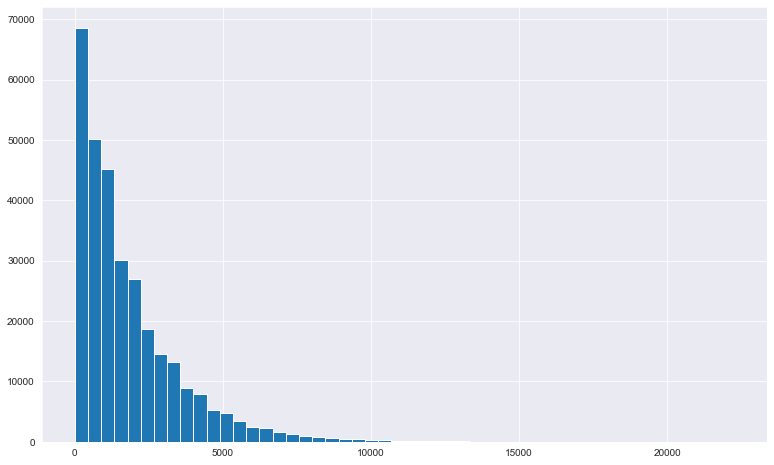

In [52]:
visits['session_duration'].hist(bins=50)
plt.show() 

In [53]:
# отформатируем отображение дробных значений
pd.set_option('display.float_format', '{:.3f}'.format)
# выведем параметры распределения
visits['session_duration'].describe()

count   309901.000
mean      1800.085
std       1803.190
min          0.000
25%        540.000
50%       1260.000
75%       2520.000
max      22260.000
Name: session_duration, dtype: float64

**Вывод**

Видим, что время, которое проводили пользователи в приложении, имеет экспоненциальное распределение с пиком в районе нуля. Скорее всего, в районе нуля распложено большое количество сессий, прерванных из-за технических ошибок, а остальные растекаются в длинный хвост вплоть до 22260 секунд.

### Продажи:

#### Время до первой покупки

Исследуем, сколько времени в среднем проходит с момента первого посещения до покупки. Для этого нам понадобится таблица `orders`, которая содержат данные о покупках. Тогда нам нужно будет вычесть из времени покупки время первого захода пользователя в приложение.

In [54]:
# из таблицы с профилями пользователей выделим платящих
profiles_payers = profiles[profiles['payer'] == True]

In [55]:
# проверим результат
profiles_payers.sample(10)

,user_id,first_ts,last_ts,channel,device,region,dt,month,week,last_dt,last_month,payer,acquisition_cost
96800,644846763001,2019-07-24 19:24:00,2019-07-26 00:25:00,FaceBoom,iPhone,United States,2019-07-24,2019-07-01,2019-07-18,2019-07-26,2019-07-01,True,1.100
80700,535909165682,2019-05-17 16:36:00,2019-10-24 08:46:00,WahooNetBanner,PC,UK,2019-05-17,2019-05-01,2019-05-16,2019-10-24,2019-10-01,True,0.536
94136,626573595855,2019-06-01 23:06:00,2019-10-23 20:21:00,WahooNetBanner,PC,France,2019-06-01,2019-06-01,2019-05-30,2019-10-23,2019-10-01,True,0.589
54122,359690316573,2019-08-03 18:59:00,2019-10-22 20:00:00,WahooNetBanner,Android,UK,2019-08-03,2019-08-01,2019-08-01,2019-10-22,2019-10-01,True,0.611
22256,148471952566,2019-10-12 23:20:00,2019-10-25 12:35:00,organic,iPhone,United States,2019-10-12,2019-10-01,2019-10-10,2019-10-25,2019-10-01,True,0.000
44338,293597673125,2019-08-17 01:13:00,2019-10-16 08:33:00,TipTop,Mac,United States,2019-08-17,2019-08-01,2019-08-15,2019-10-16,2019-10-01,True,2.977
41109,272619584763,2019-07-07 14:14:00,2019-10-31 03:18:00,LeapBob,Mac,Germany,2019-07-07,2019-07-01,2019-07-04,2019-10-31,2019-10-01,True,0.205
79702,529504862559,2019-07-31 03:00:00,2019-07-31 04:00:00,FaceBoom,iPhone,United States,2019-07-31,2019-07-01,2019-07-25,2019-07-31,2019-07-01,True,1.100
93524,622687659517,2019-07-27 23:01:00,2019-10-23 21:45:00,WahooNetBanner,iPhone,France,2019-07-27,2019-07-01,2019-07-25,2019-10-23,2019-10-01,True,0.615
99879,665734980185,2019-08-18 07:52:00,2019-08-18 08:30:00,MediaTornado,Mac,United States,2019-08-18,2019-08-01,2019-08-15,2019-08-18,2019-08-01,True,0.232


In [56]:
# создадим отдельный датафрейм, который будет содержать первые покупки пользователей
first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg(
            {
                'event_dt': 'first',
                'revenue': 'first',
            }
        )
        .rename(columns={'event_dt': 'first_order'})
        .reset_index()
    )

In [57]:
# проверим результат
first_orders.sample(10)

,user_id,first_order,revenue
5679,638929237692,2019-05-13 16:17:26,4.990
8468,954367496711,2019-05-24 06:58:10,4.990
4562,511831417243,2019-05-10 07:40:44,4.990
4498,505429111099,2019-06-27 09:45:57,4.990
108,12251662129,2019-09-23 14:04:03,4.990
4397,494446936158,2019-06-12 21:07:05,4.990
7629,855858416162,2019-06-20 15:18:56,4.990
6198,697582920606,2019-07-18 02:21:41,4.990
6322,713229127683,2019-05-05 01:06:52,4.990
8333,936826552074,2019-05-12 03:40:37,4.990


Теперь мы можем объединить эти таблицы по `user_id`.

In [58]:
# мёрджим
profiles_payers = profiles_payers.merge(
        first_orders[['user_id', 'first_order', 'revenue']],
        on=['user_id'],
        how='left',
    )

In [59]:
# проверяем результат
profiles_payers.sample(10)

,user_id,first_ts,last_ts,channel,device,region,dt,month,week,last_dt,last_month,payer,acquisition_cost,first_order,revenue
8573,966689987328,2019-06-24 13:45:00,2019-10-23 15:47:00,LeapBob,PC,UK,2019-06-24,2019-06-01,2019-06-20,2019-10-23,2019-10-01,True,0.220,2019-06-24 13:45:44,4.990
3502,394987819695,2019-07-27 00:33:00,2019-07-27 01:14:00,FaceBoom,Mac,United States,2019-07-27,2019-07-01,2019-07-25,2019-07-27,2019-07-01,True,1.100,2019-07-27 00:33:43,4.990
8476,955361635697,2019-07-09 09:05:00,2019-10-19 18:27:00,organic,Mac,United States,2019-07-09,2019-07-01,2019-07-04,2019-10-19,2019-10-01,True,0.000,2019-07-11 06:43:19,4.990
3083,349909095859,2019-06-22 10:59:00,2019-10-23 02:44:00,organic,Mac,United States,2019-06-22,2019-06-01,2019-06-20,2019-10-23,2019-10-01,True,0.000,2019-06-22 11:00:20,4.990
1109,132863892447,2019-06-18 20:57:00,2019-06-19 01:29:00,FaceBoom,PC,United States,2019-06-18,2019-06-01,2019-06-13,2019-06-19,2019-06-01,True,1.117,2019-06-18 20:57:27,4.990
4393,494315126546,2019-08-04 04:41:00,2019-10-26 13:54:00,OppleCreativeMedia,PC,France,2019-08-04,2019-08-01,2019-08-01,2019-10-26,2019-10-01,True,0.246,2019-08-06 21:15:48,4.990
5529,623610355702,2019-10-14 16:42:00,2019-10-22 00:42:00,FaceBoom,Mac,United States,2019-10-14,2019-10-01,2019-10-10,2019-10-22,2019-10-01,True,1.151,2019-10-21 21:55:00,4.990
1317,156513409051,2019-10-03 12:13:00,2019-10-04 14:48:00,FaceBoom,iPhone,United States,2019-10-03,2019-10-01,2019-10-03,2019-10-04,2019-10-01,True,1.111,2019-10-03 12:13:57,4.990
1343,159720177938,2019-07-06 05:19:00,2019-10-13 20:13:00,TipTop,iPhone,United States,2019-07-06,2019-07-01,2019-07-04,2019-10-13,2019-10-01,True,2.643,2019-07-10 12:37:03,4.990
4744,531856573525,2019-06-19 14:17:00,2019-06-22 05:08:00,FaceBoom,Mac,United States,2019-06-19,2019-06-01,2019-06-13,2019-06-22,2019-06-01,True,1.135,2019-06-19 14:17:32,4.990


In [60]:
# создаем новый столбец с длительостью сессии
profiles_payers['time_to_first_order'] = (profiles_payers['first_order'] - profiles_payers['first_ts']).dt.total_seconds()
# выводим среднее значение по новому столбцу
print('Среднее время до первой покупки: {} секунд'.format(int(profiles_payers['time_to_first_order'].mean())))
print('Среднее время до первой покупки: {} секунд'.format(int(profiles_payers['time_to_first_order'].median())))

Среднее время до первой покупки: 162710 секунд
Среднее время до первой покупки: 70 секунд


In [61]:
# взглянем на статистические показатели столбца со временем первой покупки
profiles_payers['time_to_first_order'].describe()

count       8881.000
mean      162710.693
std       521540.166
min            0.000
25%           41.000
50%           70.000
75%       127732.000
max     11418895.000
Name: time_to_first_order, dtype: float64

Видим, что медиана сильно отличается от среднего арифметического, на которое сильное вляние оказывают рекордные значения, поэтому будем использовать её.

**Вывод**

Медианное время до первой покупки составило 70 секунд, а среднее - 162710 секунд, что эквивалентно примерно 45 часам.

#### Среднее количество покупок

Рассчитаем среднее число покупок на одного покупателя за день, неделю и месяц. Построим графики изменения этих метрик во времени. Для этого в нашей таблице `orders` необходимо выделить день, неделю и месяц для каждой покупки.

In [62]:
# возьмём нашу таблицу visits и выделим в ней дату, неделю и месяц начала сессии
orders['dt'] = orders['event_dt'].dt.date
orders['month'] = orders['event_dt'].astype('datetime64[M]')
orders['week'] = orders['event_dt'].astype('datetime64[W]')

In [63]:
# проверим результат
orders.sample(10)

,user_id,event_dt,revenue,dt,month,week
7513,633263599139,2019-07-12 16:08:26,4.990,2019-07-12,2019-07-01,2019-07-11
15069,796333234402,2019-08-29 06:24:21,4.990,2019-08-29,2019-08-01,2019-08-29
6211,692808645513,2019-07-04 16:50:53,4.990,2019-07-04,2019-07-01,2019-07-04
11707,338276441244,2019-08-10 17:05:54,4.990,2019-08-10,2019-08-01,2019-08-08
39596,907001749840,2019-10-25 13:16:52,4.990,2019-10-25,2019-10-01,2019-10-24
20151,568173173994,2019-09-25 14:37:52,4.990,2019-09-25,2019-09-01,2019-09-19
39179,242133236167,2019-10-21 19:24:40,4.990,2019-10-21,2019-10-01,2019-10-17
24431,603455271582,2019-10-15 07:52:46,4.990,2019-10-15,2019-10-01,2019-10-10
12743,834691121838,2019-08-16 20:26:53,4.990,2019-08-16,2019-08-01,2019-08-15
6963,869072774208,2019-07-09 15:44:31,4.990,2019-07-09,2019-07-01,2019-07-04


In [64]:
# рассчитаем среднее количество покупок за день
daily_orders = orders.groupby(['dt']).agg({'user_id': ['count', 'nunique']})
daily_orders.columns = ['total_orders', 'unique_users']
daily_orders['orders_per_user'] = (
    daily_orders['total_orders'] / daily_orders['unique_users']
)

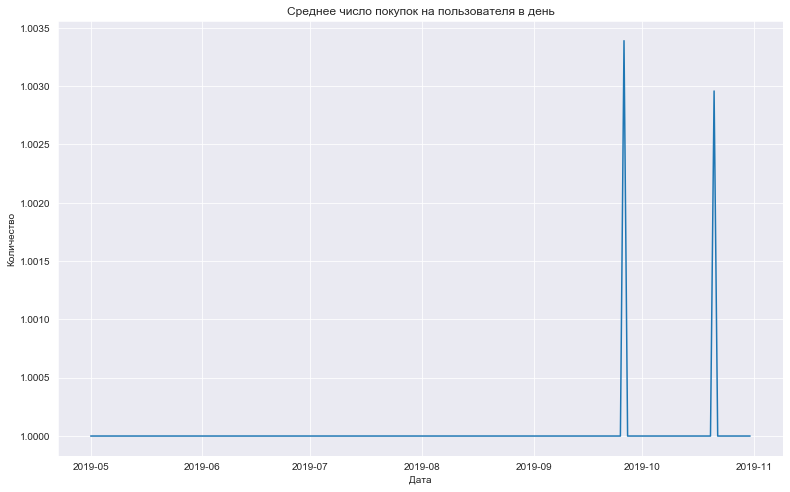

In [65]:
line_plot(daily_orders['orders_per_user'], 'Среднее число покупок на пользователя в день')

Видим, что пользователи совершают не более одной покупки в день, за исключением пары дней. Посмотрим, что там. Для этого отфильтруем строки, где показатель `orders_per_user` составляет больше единицы.

In [66]:
# фильтруем
daily_orders_filtered = daily_orders.query('orders_per_user > 1')

In [67]:
# смотрим
daily_orders_filtered

,total_orders,unique_users,orders_per_user
dt,,,
2019-09-26,296,295,1.003
2019-10-21,339,338,1.003


Получается, что за весь рассмотренный период было лишь два дня, когда одинокий пользователь совершил не одну покупку, а целых две! Это в два раза больше, если что!))

In [68]:
# рассчитаем среднее количество покупок за неделю
weekly_orders = orders.groupby(['week']).agg({'user_id': ['count', 'nunique']})
weekly_orders.columns = ['total_orders', 'unique_users']
weekly_orders['orders_per_user'] = (
    weekly_orders['total_orders'] / weekly_orders['unique_users']
)

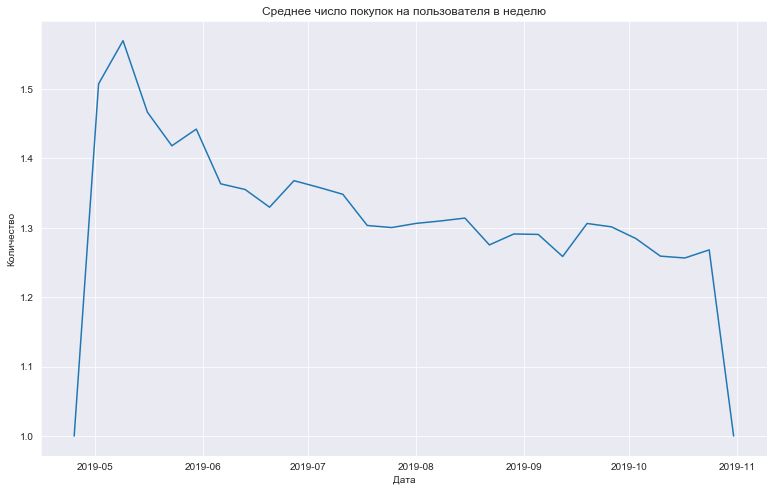

In [69]:
line_plot(weekly_orders['orders_per_user'], 'Среднее число покупок на пользователя в неделю')

Очевидно, что среднее количество покупок на пользователя в неделю постепенно снижалось с мая до конца октября, в конце которого видим резкий обвал, который по времени совпадает с обвалом в количестве активных пользователей.

In [70]:
# рассчитаем среднее количество покупок за месяц
monthly_orders = orders.groupby(['month']).agg({'user_id': ['count', 'nunique']})
monthly_orders.columns = ['total_orders', 'unique_users']
monthly_orders['orders_per_user'] = (
    monthly_orders['total_orders'] / monthly_orders['unique_users']
)

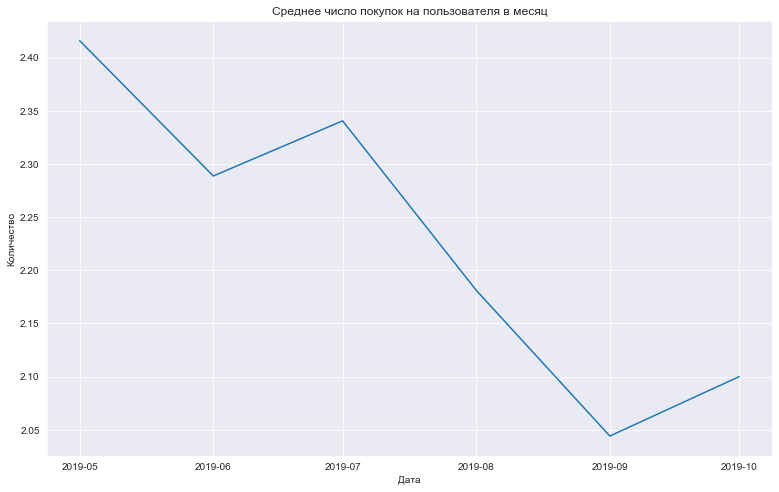

In [71]:
line_plot(monthly_orders['orders_per_user'], 'Среднее число покупок на пользователя в месяц')

По среднему количеству покупок в месяц график так же не радужный: число планомерно снижается с течением времени.

**Вывод**

Среднее количество покупок на пользователя в день равняется у нас единице, количество покупок со временем уменьшается, что очевидно по графикам среднего числа покупок за неделю и за месяц.

#### Средний чек

Рассчитаем средний чек за день, неделю и месяц. Построим графики изменения этих метрик во времени.

In [72]:
# рассчитаем средний чек за день
daily_revenue = orders.groupby(['dt']).agg({'revenue': 'mean'})
# рассчитаем средний чек покупок за неделю
weekly_revenue = orders.groupby(['week']).agg({'revenue': 'mean'})
# рассчитаем средний чек за месяц
monthly_revenue = orders.groupby(['month']).agg({'revenue': 'mean'})

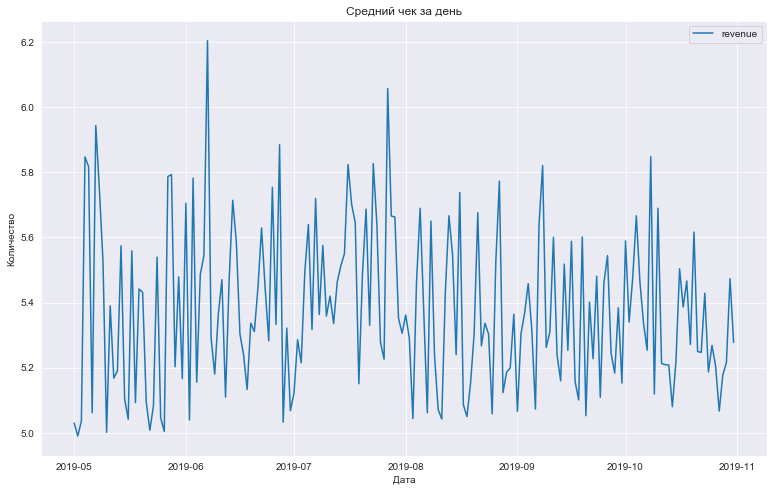

In [73]:
# построим график среднего чека за день во времени
line_plot(daily_revenue, 'Средний чек за день')

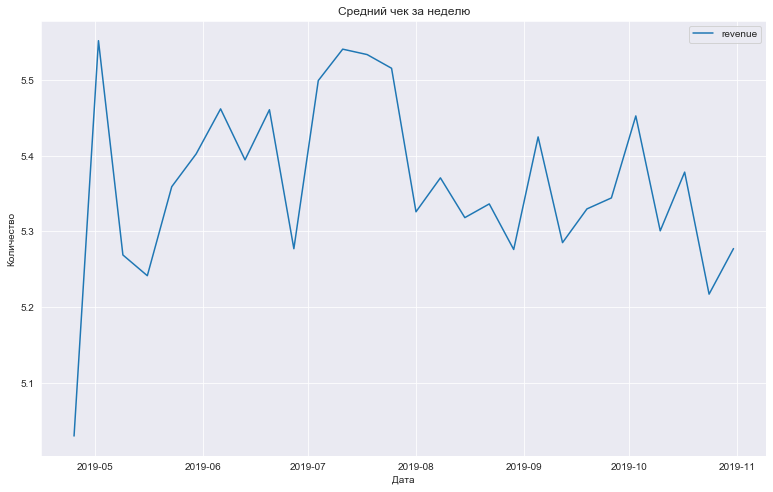

In [74]:
# построим график среднего чека за неделю во времени
line_plot(weekly_revenue, 'Средний чек за неделю')

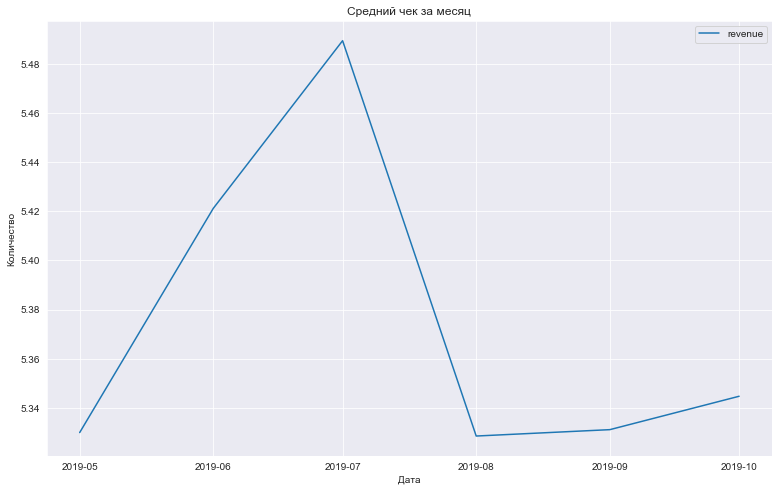

In [75]:
# построим график среднего чека за месяц во времени
line_plot(monthly_revenue, 'Средний чек за месяц')

**Вывод**

Средний чек у нас колеблется от 5 до 6 в среднем за день, от 5.2 до 5.5 в среднем за неделю и от 5.3 до 5.5 в среднем за месяц.

### Маркетинг:

#### Расходы на маркетинг

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [76]:
# выведем общую сумму затрат на маркетинг
print('Общая сумма расходов на маркетинг: {}'.format(int(costs['costs'].sum())))

Общая сумма расходов на маркетинг: 105497


Сгруппируем таблицу `costs` по столбцу `channel`, чтобы посчитать затраты на каждый источник.

In [77]:
# выводим траты по каждому источнику
channel_costs = costs.groupby(['channel']).agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
channel_costs

,costs
channel,
TipTop,54751.300
FaceBoom,32445.600
WahooNetBanner,5151.000
AdNonSense,3911.250
OppleCreativeMedia,2151.250
RocketSuperAds,1833.000
LeapBob,1797.600
lambdaMediaAds,1557.600
MediaTornado,954.480


Далее сгруппируем по дате, посчитаем общие затраты по дням и выведем график.

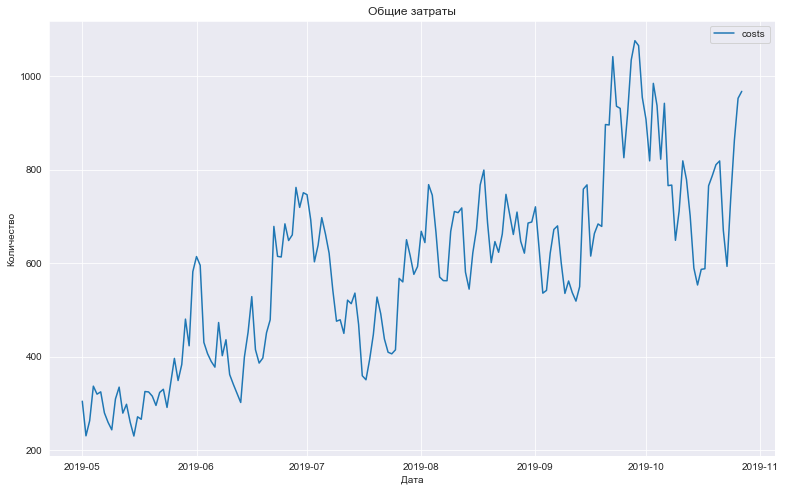

In [78]:
# группируем и выводим график
costs_by_date = costs.groupby(['dt']).agg({'costs': 'sum'})
line_plot(costs_by_date, 'Общие затраты')

Затем выведем затраты во времени по источникам. Для этого создадим новую сводную таблицу.

In [79]:
# создаём сводную таблицу
channel_costs_by_date = costs.pivot_table(index='dt', columns='channel', values='costs')
# проверяем результат
channel_costs_by_date.sample(10)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-09-14,11.550,198.000,11.130,5.760,11.750,8.450,472.500,27.600,5.040,6.400
2019-08-08,8.400,159.500,10.500,3.600,16.500,5.915,321.000,29.400,3.570,4.000
2019-06-21,19.950,174.900,13.230,4.080,13.250,10.530,203.300,31.200,3.600,4.800
2019-05-24,37.800,82.500,3.150,5.760,5.750,16.965,102.600,12.600,8.400,16.000
2019-07-28,25.200,206.800,13.020,4.320,15.500,9.100,332.800,29.400,4.320,9.600
2019-07-05,23.100,240.900,12.390,6.480,14.750,15.470,335.400,34.800,4.320,9.600
2019-09-12,18.900,128.700,8.190,1.920,10.500,4.225,315.000,22.200,4.320,4.800
2019-05-12,44.100,100.100,4.200,9.600,3.500,21.060,56.000,15.600,10.800,14.400
2019-10-13,15.750,180.400,11.970,4.800,12.500,5.525,420.000,30.600,5.670,13.600


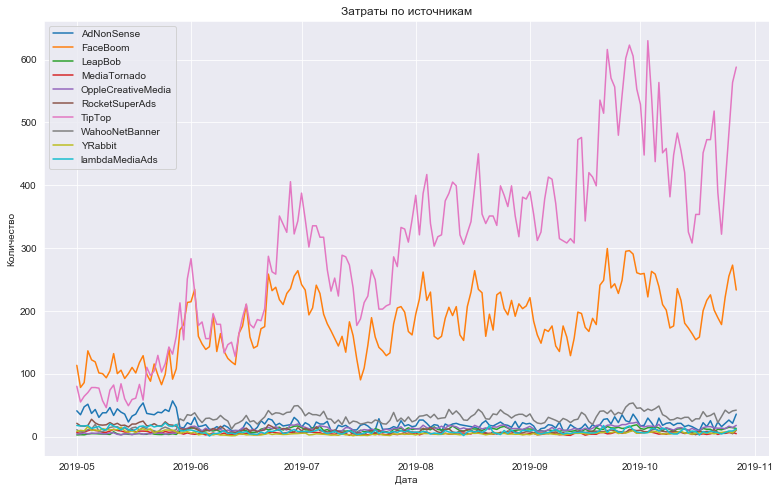

In [80]:
# строим график
line_plot(channel_costs_by_date, 'Затраты по источникам')

**Вывод**

Общие затраты составили 105497. Самые затратные источники - это TipTop и FaceBoom. На эти же два источника затраты росли со временем, остальные источники потребляли примерно одинаковое количество денег во времени. Общие затраты также росли со временем, TipTop и FaceBoom являлись локомотивом для этого.

#### CAC

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей. Стоимость привлечения каждого пользователя у нас уже посчитана и содержится в столбце `acquisition_cost` таблицы `profiles`. Сделаем группировку по источнику привлечения и посчитаем среднюю стоимость привлечения по каждому из них.

In [81]:
#вспомним содержимое таблицы profiles
profiles.sample(10)

,user_id,first_ts,last_ts,channel,device,region,dt,month,week,last_dt,last_month,payer,acquisition_cost
30506,202544586131,2019-06-07 11:45:00,2019-08-08 14:55:00,WahooNetBanner,Android,Germany,2019-06-07,2019-06-01,2019-06-06,2019-08-08,2019-08-01,False,0.600
62267,413281767583,2019-10-18 11:39:00,2019-10-20 11:29:00,FaceBoom,Android,United States,2019-10-18,2019-10-01,2019-10-17,2019-10-20,2019-10-01,False,1.094
149575,997054358804,2019-10-25 00:38:00,2019-10-25 00:47:00,FaceBoom,iPhone,United States,2019-10-25,2019-10-01,2019-10-24,2019-10-25,2019-10-01,False,1.105
68359,453687459939,2019-07-07 16:40:00,2019-07-09 20:03:00,OppleCreativeMedia,Android,UK,2019-07-07,2019-07-01,2019-07-04,2019-07-09,2019-07-01,False,0.254
84501,561918530361,2019-09-30 13:51:00,2019-09-30 14:15:00,TipTop,iPhone,United States,2019-09-30,2019-09-01,2019-09-26,2019-09-30,2019-09-01,False,3.591
134600,897435921633,2019-05-15 04:44:00,2019-05-15 05:23:00,organic,Android,Germany,2019-05-15,2019-05-01,2019-05-09,2019-05-15,2019-05-01,False,0.000
28410,189065039855,2019-07-22 06:20:00,2019-07-22 06:22:00,organic,Android,United States,2019-07-22,2019-07-01,2019-07-18,2019-07-22,2019-07-01,False,0.000
19829,131986480847,2019-08-13 08:39:00,2019-08-18 00:31:00,FaceBoom,iPhone,United States,2019-08-13,2019-08-01,2019-08-08,2019-08-18,2019-08-01,False,1.131
77680,515551829598,2019-05-05 02:50:00,2019-05-21 02:57:00,organic,PC,France,2019-05-05,2019-05-01,2019-05-02,2019-05-21,2019-05-01,False,0.000
141163,941788495965,2019-08-10 16:09:00,2019-08-12 12:59:00,organic,PC,France,2019-08-10,2019-08-01,2019-08-08,2019-08-12,2019-08-01,False,0.000


In [82]:
# выведем средний CAC для всего проекта
print('Средний CAC на одного пользователя для всего проекта: {:.3f}'.format(profiles['acquisition_cost'].mean()))

Средний CAC на одного пользователя для всего проекта: 0.703


In [83]:
# выведем таблицу со средней стоимостью привлечения пользователя по каждому источнику
acquisition_cost_by_channel = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)
acquisition_cost_by_channel

,acquisition_cost
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


**Вывод**

Видим, что самые затратные пользователи пришли из TipTop, далее идут FaceBoom и AdNonSense, средние траты на пользователя в которых в 2.5 раза ниже, чем в TipTop. При этом, четыре самых дорогих источника превышают средний CAC по всему проекту.

### Подведём итог

* **Продукт:**
     
     По всем метрикам количество активных пользователей росло до второй половины октября, когда наблюдается резкое падение количества активных пользователей. На графиках наблюдается некоторая цикличность. Среднее количество пользовательских сессий совпадает с DAU. График так же идентичный. Получается, что все пользователи заходят в приложение на чаще раза в календарный день. Время, которое проводили пользователи в приложении, имеет экспоненциальное распределение с пиком в районе нуля, куда так же вошли сессии длительностью меньше минуты. Скорее всего, в районе нуля распложено большое количество сессий, прерванных из-за технических ошибок, а остальные растекаются в длинный хвост вплоть до 22260 секунд.


* **Продажи:**
    
    Медианное время до первой покупки составило 70 секунд, а среднее - 162710 секунд, что эквивалентно примерно 45 часам. Среднее количество покупок на пользователя в день у нас равняется единице, при этом количество покупок со временем уменьшается, что очевидно по графикам среднего числа покупок за неделю и за месяц. Средний чек у нас колеблется от 5 до 6 в среднем за день, от 5.2 до 5.5 в среднем за неделю и от 5.3 до 5.5 в среднем за месяц.


* **Маркетинг:**

    Общие затраты составили 105497. Самые затратные источники - это TipTop и FaceBoom. На эти же два источника затраты росли со временем, остальные источники потребляли примерно одинаковое количество денег во времени. Общие затраты также росли со временем, TipTop и FaceBoom являлись локомотивом для этого. Самые затратные пользователи пришли из TipTop, далее идут FaceBoom и AdNonSense, средние траты на пользователя в которых в 2.5 раза ниже, чем в TipTop. При этом, четыре самых дорогих источника превышают средний CAC по всему проекту.

## Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

In [84]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [85]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [86]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [87]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [88]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [89]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [90]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Оценим окупаемость рекламы для привлечения пользователей

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Из профилей пользователей исключим людей с органическим трафиком, так как мы за них ничего не платим.

In [91]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа
horizon_days = 14
# исключим из расчётов органических пользователей
profiles_without_organic = profiles.query('channel != "organic"')

### Проанализируем общую окупаемость рекламы

Построим графики LTV, CAC и ROI.

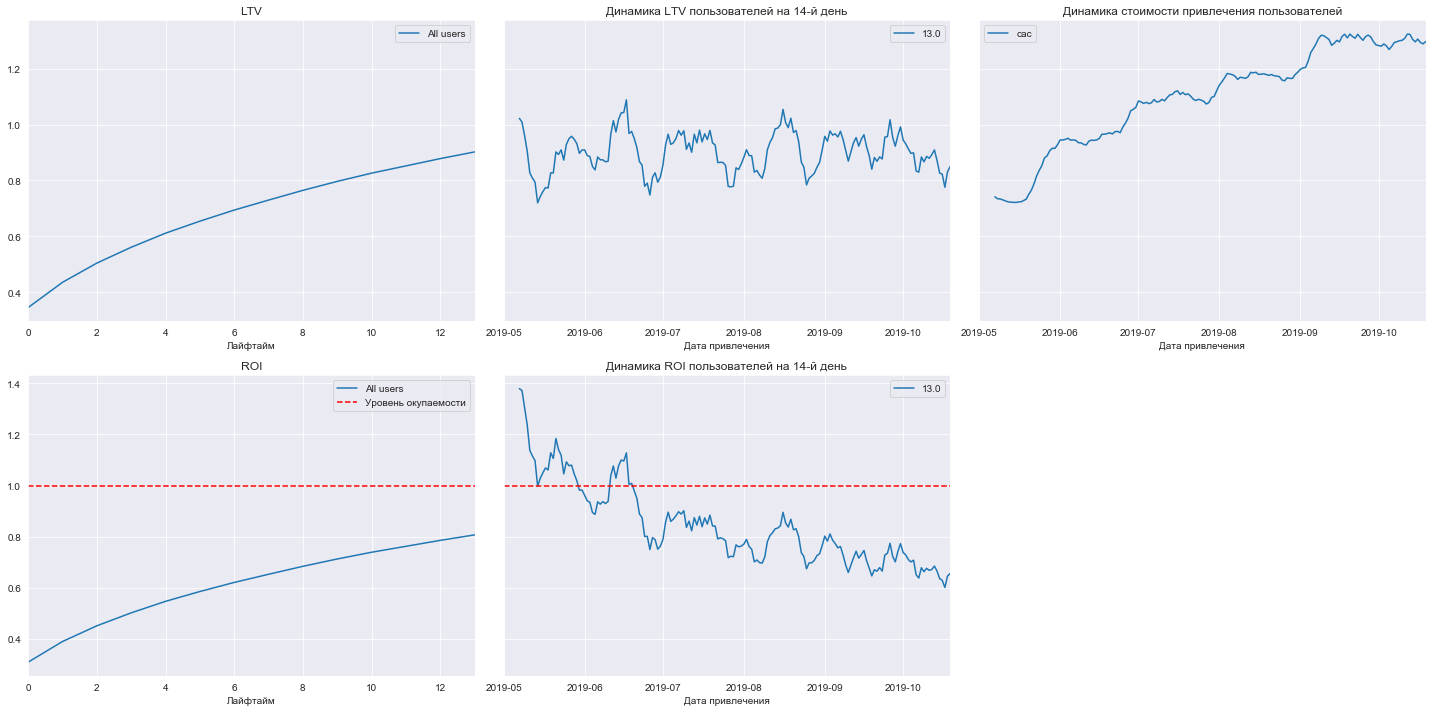

In [92]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод**

* LTV стабилен, динамика LTV на 14-й день колеблется в диапазоне 0.8-1.0;
* стоимость привлечения со временем растёт;
* реклама не окупается, так как ROI не дотягивает до нужного уровня, динамика ROI на 14-й день ухудшается.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам

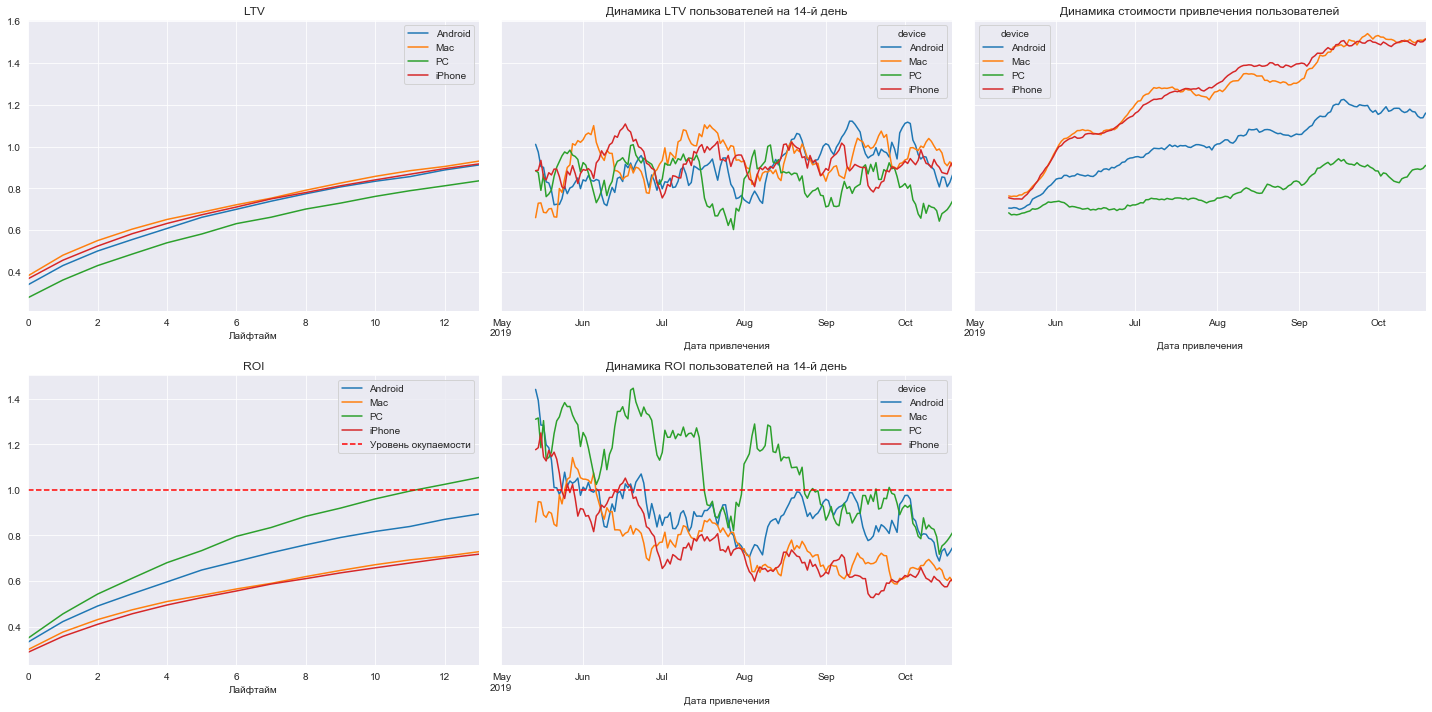

In [93]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

* LTV стабилен, динамика LTV на 14-й день колеблется в диапазоне 0.8-1.0, как и без разбивки по устройствам, пользователи PC немного отстают от остальных;
* стоимость привлечения со временем растёт. Пользователи с iPhone и Mac самые дорогие по затратам на привлечение, пользователи PC наиболее дешёвые;
* окупаются только пользователи PC, пользователи Android находятся около 0, а пользователи iPhone и Mac - аутсайдеры.

#### Проанализируем окупаемость рекламы с разбивкой по странам

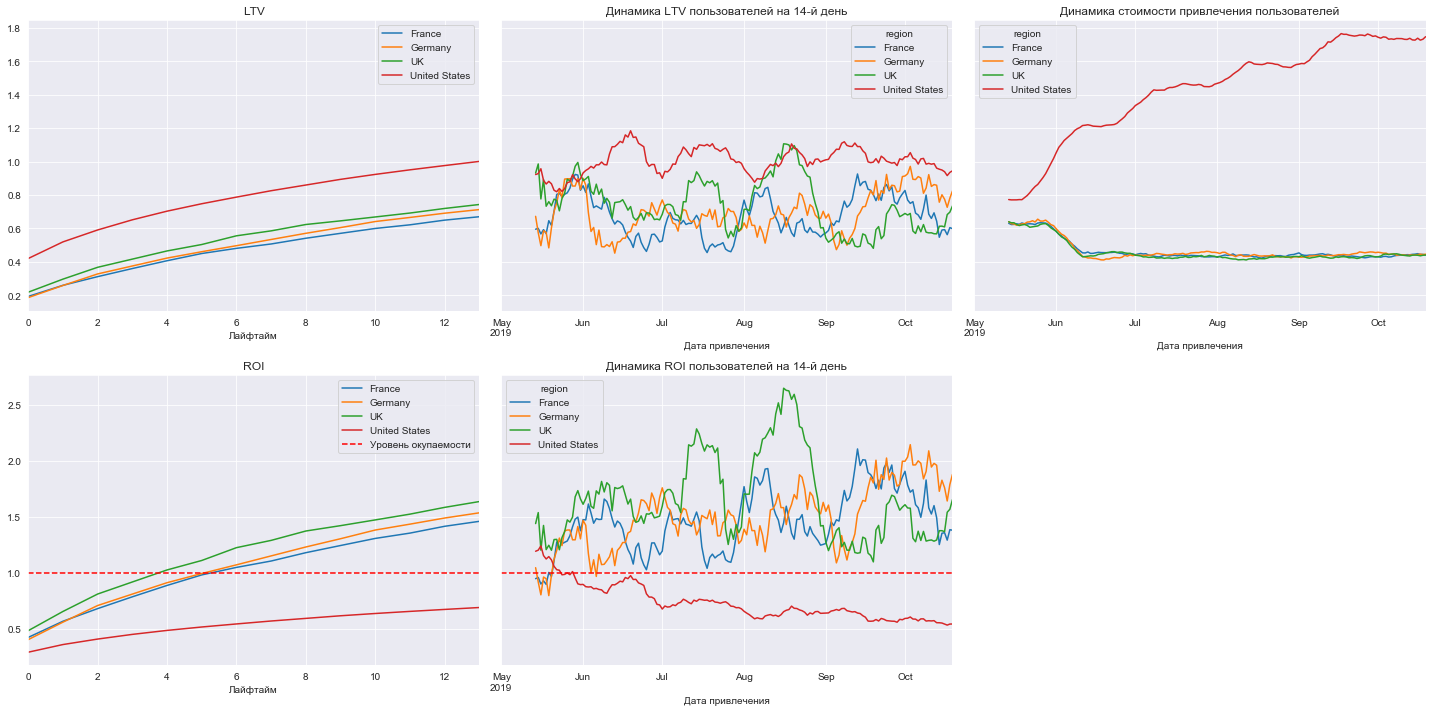

In [94]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

* LTV стабилен, динамика LTV на 14-й день колеблется в диапазоне 0.6-1.0 для всех стран кроме United States, пользователи из оттуда выделяются и являются самыми ценными;
* стоимость привлечения со временем растёт только для пользователей из United States, для остальных стран находится на стабильном уровне.
* окупаются только пользователи из France, Germany и UK, а пользователи из United States убыточны.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

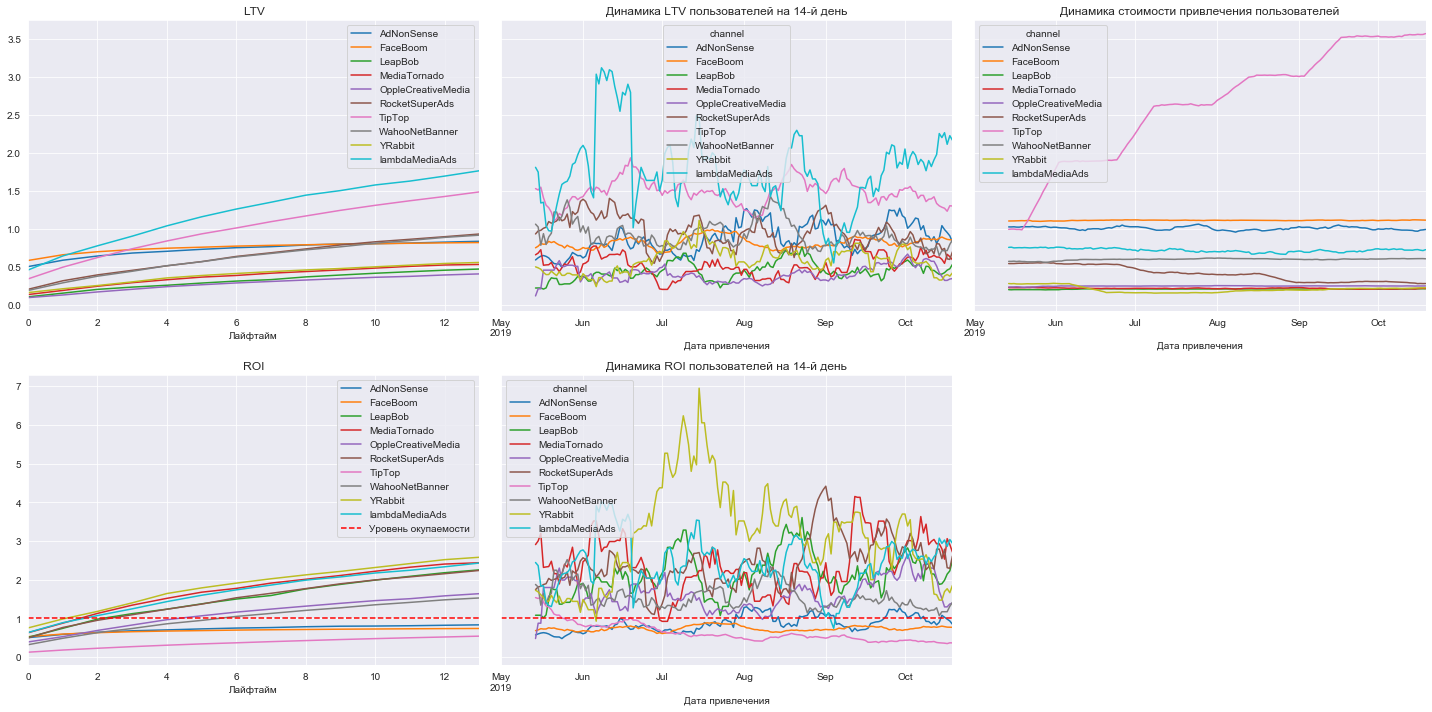

In [95]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**

* LTV достаточно стабилен, динамика LTV на 14-й день колеблется в диапазоне 0.5-1.0 для всех источников привлечения, кроме lambdaMediaAds и TipTop, ценность которых заметно повыше;
* стоимость привлечения со временем растёт только для источника TipTop, для остальных каналов находится на стабильном уровне.
* окупаются все каналы, кроме TipTop, FaceBoom и AdNonSense.

### Проанализируем конверсию и удержание

Построим графики конверсии и удержания.

#### Проанализируем конверсию и удержание с разбивкой по устройствам

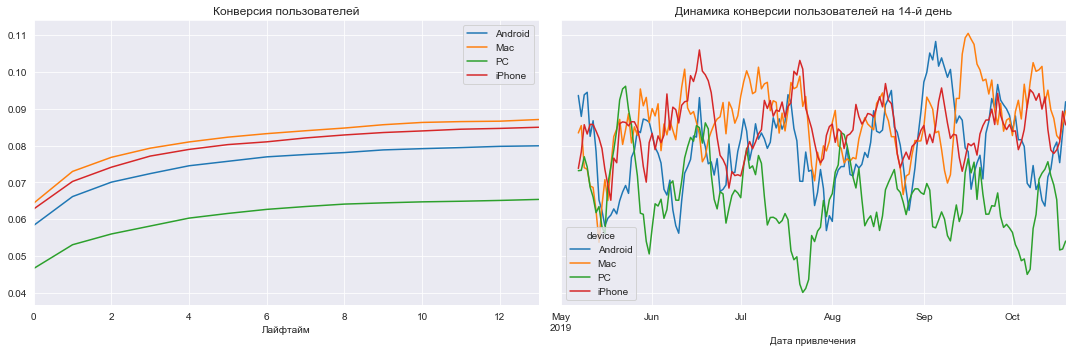

In [96]:
# смотрим конверсию по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

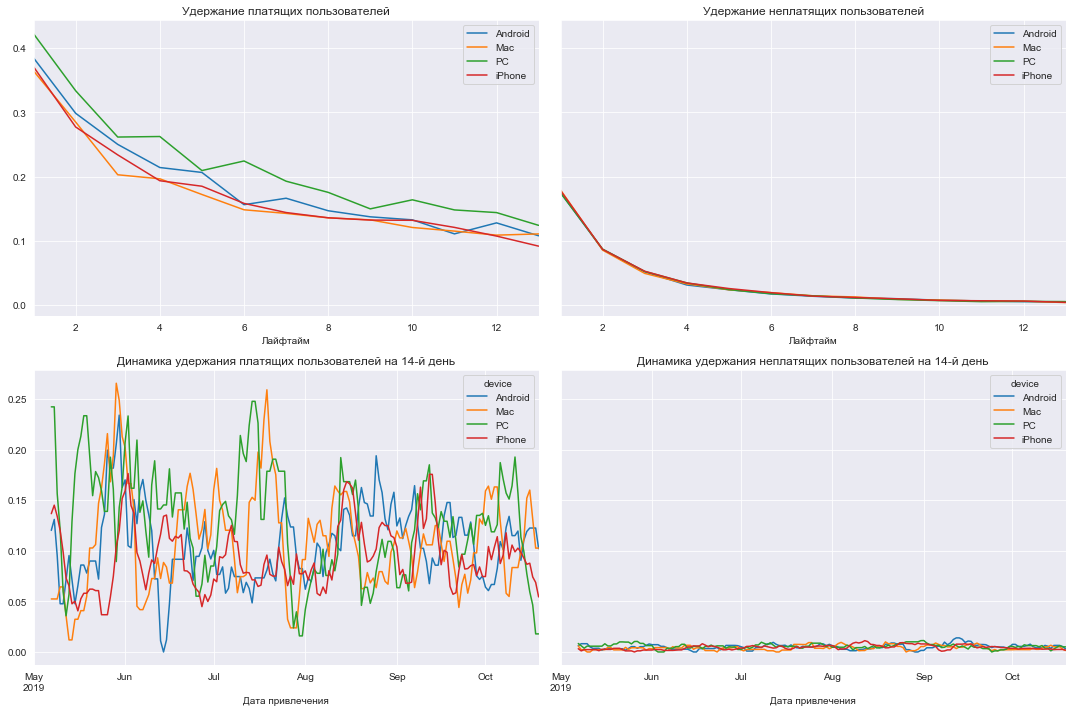

In [97]:
# смотрим удержание по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

Лучшая конверсия у пользователей Mac и iPhone, у PC - худшая. Удержание схожее по всем типам устройств.

#### Проанализируем конверсию и удержание с разбивкой по странам

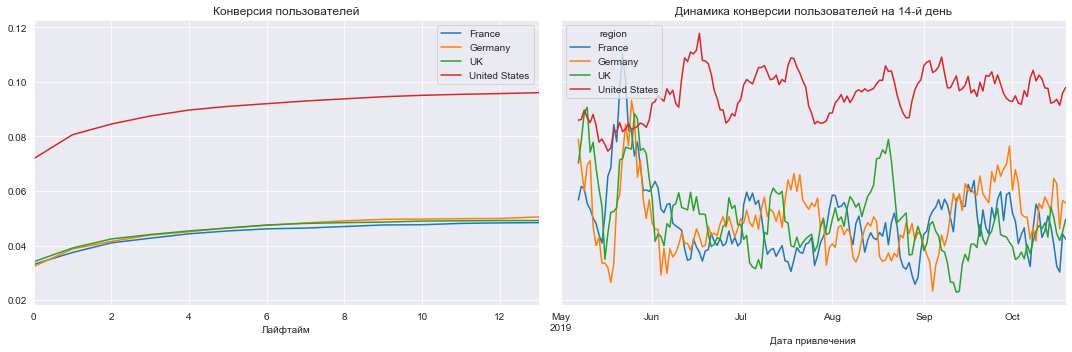

In [98]:
# смотрим конверсию по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

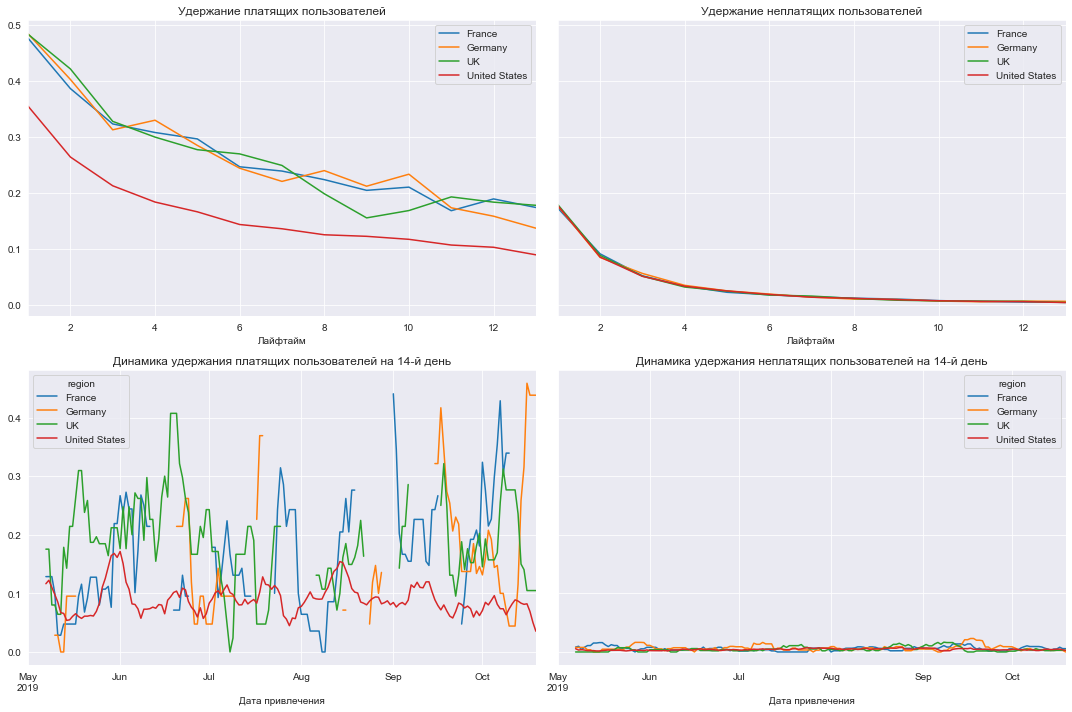

In [99]:
# смотрим удержание по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

Стабильно лучшая конверсия у пользователей из United States, при этом платящие оттуда хуже всех удерживаются.

#### Проанализируем конверсию и удержание с разбивкой по рекламным каналам

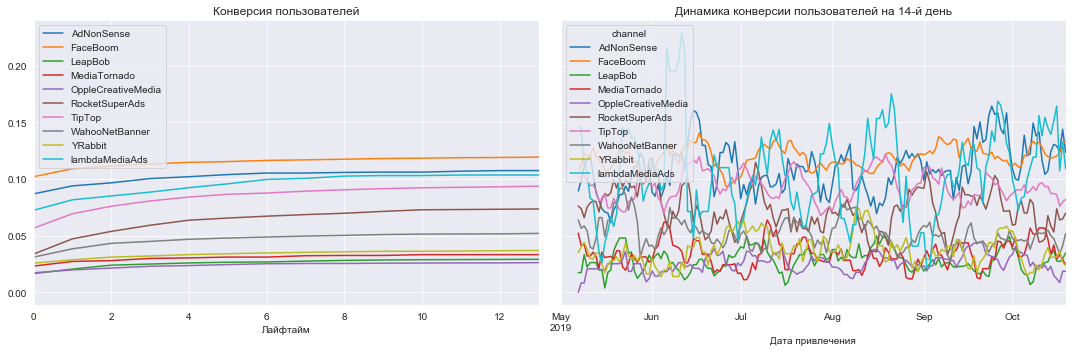

In [100]:
# смотрим конверсию по рекламным каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

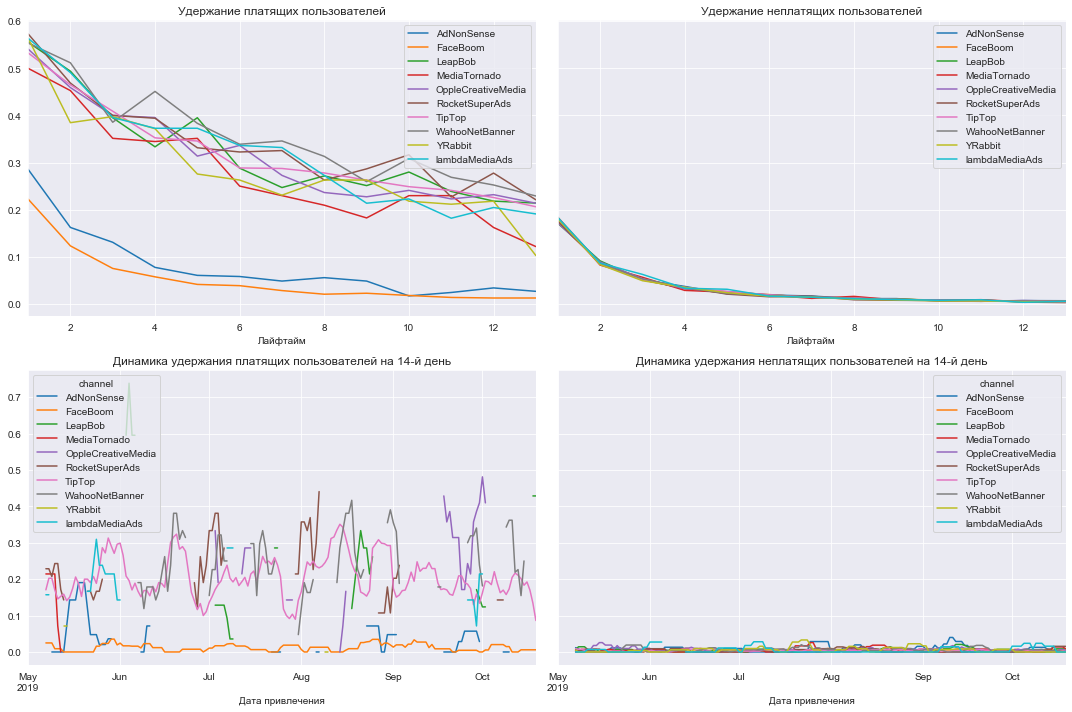

In [101]:
# смотрим удержание по рекламным каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**

AdNonSense и FaceBoom имеют самую лучшую конверсию по каналам и при этом у них самое низкое удержание платящих пользователей.

## Выводы и рекомендации

#### Вывод

   В начале проекта мы предобработали наши данные. Устранили стилистические недостатки в названиях столбцов, явных дубликатов не обнаружили, составили профили наших пользователей. Убедились, что временной интервал в данных совпадает с поставленной задачей. Посмотрели на корректность категориальные и числовые переменные.
   
   Далее посмотрели распределение пользователей по странам, устройствам и по каналам привлечения. Подавляющее большинство пользователей у нас из United States, они же являются лидерами по доле платящих пользователей. Больше всего пользователей заходят через iPhone, среди владельцев iPhone и Mac наиболее высокая доля платящих. Больше всего у нас "бесплатных" пользователей, но среди них при этом самый низкий процент плательщиков. Среди "платных" больше всего пришли через FaceBoom, эта же группа иммеет наивысшую долю тех, кто что-то покупал.
   
   Число активных пользователей у нас росло вплоть до второй половины октября. Среднее количество пользовательских сессий за день у нас оказалось равно 1. Количество сессий имеет пик в районе нуля и дальше распределено экспоненциально, образуя длинный хвост.
   
   Среднее время до первой покупки пользователем у нас получилось около 45 часов, медиана - 70 секунд. Среднее количество покупок за день у нас равно единице, а среднее количество покупок за неделю и месяц уменьшается со временем. Средний чек за день находится в диапазоне от 5 до 6, средний чек за неделю и месяц расположен между 5.2 и 5.5.
   
   Самыми затратными источниками привлечения являются TipTop и FaceBoom, траты на них увеличиваются со временем, из-за них также растут общие затраты на привлечение.
   
   Общий LTV у нас стабилен, затраты на привлечение растут, реклама не окупается. Стоимость привлечения пользователей iPhone и Mac со временем растёт, они же у нас не окупаются, в отличие от PC, которые самые "дешёвые". В разрезе по странам у нас окупаются все, кроме United States, на которых ещё и растут траты на привлечение. По рекламным каналам картина следующая: самые ценные - lambdaMediaAds и TipTop, для которого сильно растёт стоимость привлечения со временем. При этом TipTop наряду с FaceBoom и AdNonSense у нас не окупаются.
   
   По платформам лучшая конверсия у пользователей Mac и iPhone, у PC - худшая. Удержание схожее по всем типам устройств. Стабильно лучшая конверсия у пользователей из United States, при этом платящие оттуда хуже всех удерживаются. AdNonSense и FaceBoom имеют самую лучшую конверсию по каналам привлечения и при этом у них самое низкое удержание платящих пользователей.

#### Рекомендации для маркетинга

   Маркетингу я бы рекомендовал сделать акцент на привлечение пользователей за пределами United States, чтобы снизить зависимость показателей от этой страны, так как в данный момент она перечёркивает все положительные результаты по другим странам. Нужно постараться подтянуть конверсию по другим странам до уровня Америки. Но при этом в Америке нужно подтянуть удержание до уровня остальных стран. Пользователи PC самые "дешёвые" по стоимости привлечения, они окупаются, но при этом их не так много с сравнении с пользователями iPhone, которые не окупаются, хоть и имеют самый высокий процент платящих. Конверсия у пользователей PC ниже других типов, нужно с этим поработать, чтобы её повысить. Можно было бы постараться побольше людей привести с этой платформы. Необходимо оптимизировать расходы на канал привлечения TipTop, так как на него постоянно растут затраты и он не окупается, при этом из него приходит меньше людей, чем из FaceBoom, и доля платящих у него не самая лучшая. AdNonSense и FaceBoom имеют самую лучшую конверсию, хорошо бы брать с них пример для остальных каналов, но при этом нужно поработать с удержанием пользователей оттуда.